In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2 Dataset Setup and Exploration

In [289]:
df = pd.read_csv(r'ml-latest-small/ratings.csv')
movie_names = pd.read_csv(r'ml-latest-small/movies.csv')

In [290]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [291]:
df.shape

(100836, 4)

## Popularity

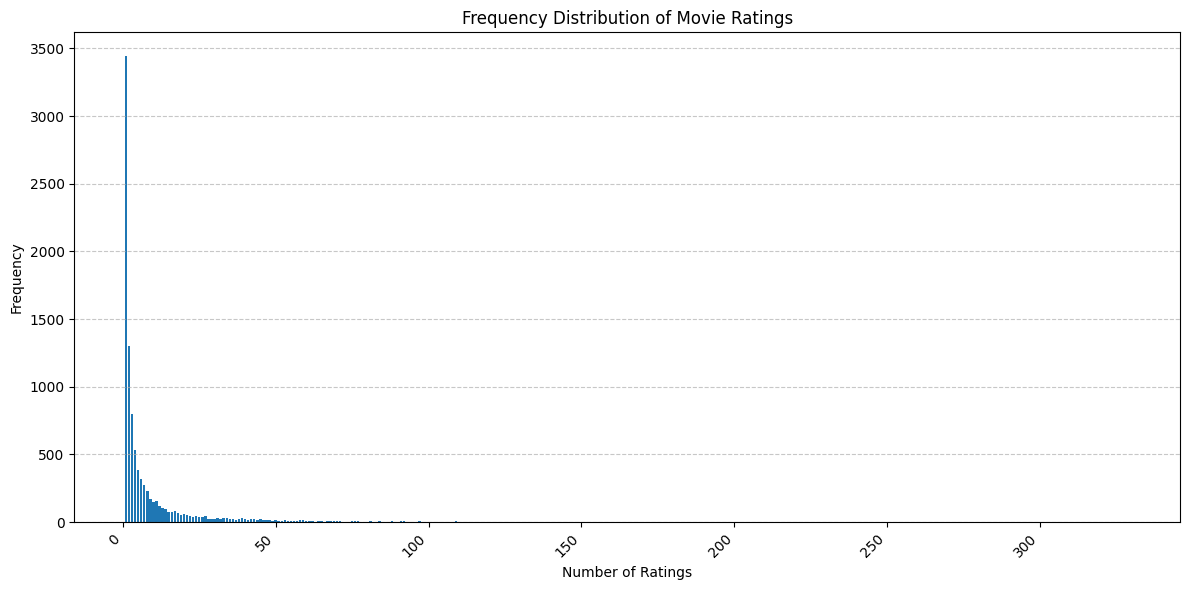

In [292]:
# Calculate the frequency of each rating count
rating_counts = df['movieId'].value_counts()
frequency = rating_counts.value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(frequency.index, frequency.values)

plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Movie Ratings')

# Adjust x-axis to show more tick marks
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [293]:
top_movies = df['movieId'].value_counts().head(5)
#print(f"Top 5 movies by frequency: {top_movies.nlargest(5)}")
top_movies_df = top_movies.reset_index()
top_movies_df.columns = ['movieId', 'frequency']
merged_df = pd.merge(top_movies_df, movie_names, on='movieId')

# Print the movie titles and their frequency counts
print(merged_df[['title', 'frequency']])

                              title  frequency
0               Forrest Gump (1994)        329
1  Shawshank Redemption, The (1994)        317
2               Pulp Fiction (1994)        307
3  Silence of the Lambs, The (1991)        279
4                Matrix, The (1999)        278


## Entropy

In [294]:
def entropy(probs):
    return -np.sum(probs * np.log2(probs))
def calculate_movie_entropy(df):
    movie_group = df.groupby('movieId')['rating'].value_counts(normalize=True)  # Get probabilities (p_i)
    movie_entropy = {}
    for movie_id, ratings in movie_group.groupby(level=0):  # Group by movieId
        probs = ratings.values
        movie_entropy[movie_id] = entropy(probs)
    return movie_entropy
movie_entropies = calculate_movie_entropy(df)

In [295]:
ratings_2000 = np.array([400/2000] * 5)  
entropy_2000 = entropy(ratings_2000)

ratings_5 = np.array([1/5] * 5) 
entropy_5 = entropy(ratings_5)

print(f"Entropy for item with 2000 ratings (400 each): {entropy_2000}")
print(f"Entropy for item with 5 ratings (1 each): {entropy_5}")

Entropy for item with 2000 ratings (400 each): 2.321928094887362
Entropy for item with 5 ratings (1 each): 2.321928094887362


In [296]:
unique_ratings = df['rating'].unique()
num_ratings = len(unique_ratings)

print(f"Possible ratings: {unique_ratings}")
print(f"Number of possible ratings: {num_ratings}")

Possible ratings: [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]
Number of possible ratings: 10


In [297]:
min_entropy = min(movie_entropies.values())
max_entropy = max(movie_entropies.values())

print(f"Minimum Entropy: {min_entropy}")
print(f"Maximum Entropy: {max_entropy}")

Minimum Entropy: -0.0
Maximum Entropy: 3.1820912267441486


In [298]:
max_possible_entropy = entropy([1/10] * 10) #10 possile rating vals
min_possible_entropy = 0  # All ratings are the same

print(f"Valid entropy range: [{min_possible_entropy}, {max_possible_entropy}]")

Valid entropy range: [0, 3.321928094887362]


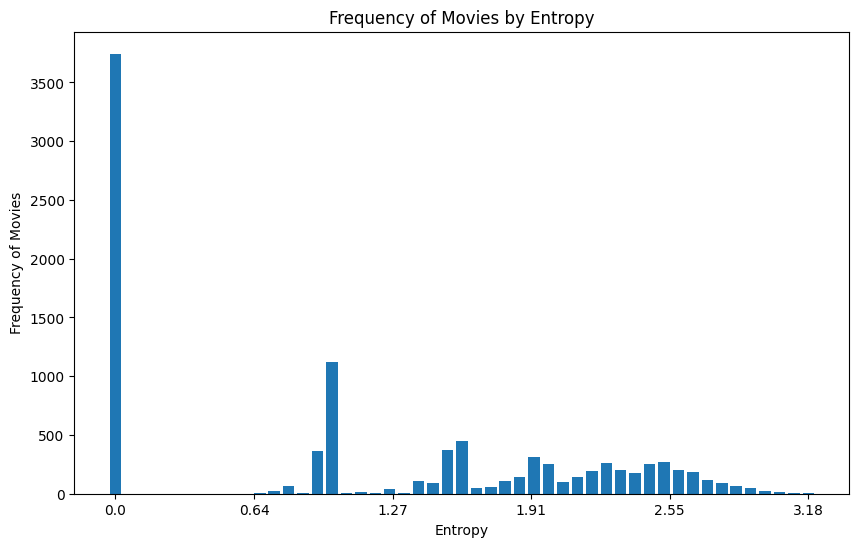

In [299]:
entropy_df = pd.DataFrame({
    'movieId': list(movie_entropies.keys()),
    'entropy': list(movie_entropies.values())
})
num_bins = 50
entropy_bins = np.linspace(entropy_df['entropy'].min(), entropy_df['entropy'].max(), num_bins)
entropy_df['entropy_bin'] = pd.cut(entropy_df['entropy'], bins=entropy_bins, include_lowest=True)
entropy_frequencies = entropy_df['entropy_bin'].value_counts(sort=False)

plt.figure(figsize=(10,6))
plt.bar(range(num_bins-1), entropy_frequencies.values)

plt.title('Frequency of Movies by Entropy')
plt.xlabel('Entropy')
plt.ylabel('Frequency of Movies')

# Set X-ticks and labels with custom spacing (e.g., 0.5, 1.0, 1.5, etc.)
x_ticks = np.linspace(0, entropy_df['entropy'].max(), 6)  # 6 evenly spaced ticks (customizable)
plt.xticks(ticks=np.linspace(0, num_bins-2, len(x_ticks)), labels=np.round(x_ticks, 2))

plt.show()

